Generate Data on participant characteristics, app usage, research satisfaction and retention.

# The code below will produce a data.frame with 1000 rows and 12 columns with the following variables:
ID: Randomly generated 6-digit numeric ID which is unique for each participant.

Age: Continuous variable. Represents age of participants in years at the time of enrolment.  Randomly generated number between 13 and 18, because the research is for adolescents and young adults.

Sex: Categorical variable.

MH_score: Continuous variable describing a composite Mental Health score ranging between 1 and 10. Generated from a normal distribution with a mean of 5 and a standard deviation of 2.

Participant_Satisfaction_Score: Continuous variable between 1 and 5 on a 5-point Likert scale that represents the participant's satisfaction with the research (this is general and could encompass satisfaction with the app, the intervention and the research itself). Randomly generated from a normal distribution.

Num_Logins: Continuous variable. Generated by function based on the age, MH_score and Participant_Satisfaction_Score variables.

Login_Datetimes: Datetime variable. A random datetime is generated for the "Num_Logins" within the last 90 days. Used to derive "Recency", "Frequency" and "Latency" heuristics.

Recency: Continuous variable derived from Login_Datetimes. Represents the freshness of app activity.

Frequency: Continuous variable derived from Login_Datetimes. Represents the number of times a participant has logged into the app in the last 30 days.

Latency: Continuous variable derived from Login_Datetimes. Represents the average gap between app logins.

Responsiveness: Continuous variable. Represents responsiveness to notifications in hours.  Randomly generated as a function of the number of logins.

Retention: Binary variable.  Represents whether a participant is still active in the research after 10 years.  0 represents drop-out and 1 represents retention. Generated by assigning retention probabilities to participants (30% attrition, 70% retention), with an additional function updating the probabilities based on MH_score, Participant_Satisfaction_Score and Recency.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import datetime

In [2]:
## seed for reproducibility
random.seed(405)

In [3]:
# App Usage Heuristics

# Function to calculate recency, the freshness of app activity
def calculate_recency(last_activity_date):
    current_date = datetime.date.today()
    recency = (current_date - last_activity_date.date()).days
    return recency

# Function to calculate frequency (how many times the participant logged into the app within the last 30 days)
def calculate_frequency(login_datetimes):
    if len(login_datetimes) == 0:
        return 0

    current_datetime = datetime.datetime.now()
    thirty_days_ago = current_datetime - datetime.timedelta(days=30)
    count = sum(1 for login_datetime in login_datetimes if thirty_days_ago <= login_datetime <= current_datetime)
    frequency = count
    return frequency

# Function to calculate latency, average gap between app use
def calculate_latency(login_datetimes):
    if len(login_datetimes) < 2:
        return 0

    time_diffs = [(login_datetimes[i] - login_datetimes[i-1]).days for i in range(1, len(login_datetimes))]
    mean_latency = sum(time_diffs) / len(time_diffs)
    return mean_latency

In [5]:
# Generate data
def generate_unique_id():
    # Generate a unique numeric ID
    return random.randint(100000, 999999)

participants = []
retention_probabilities = [0] * 3 + [1] * 7  # 30% 0's (i.e., not retained), 70% 1's (retained)

# Generate a list of unique participant IDs
participant_ids = random.sample(range(100000, 999999 + 1), 1000)

for participant_id in participant_ids:
    age = random.randint(13, 18)
    sex = random.choice(['Male', 'Female'])
    mh_score = round(random.normalvariate(5, 2))
    participant_satisfaction_score = round(random.normalvariate(3, 1))

    # Ensure the MH_score is between 1 and 10
    mh_score = max(1, min(10, mh_score))
    participant_satisfaction_score = max(1, min(5, participant_satisfaction_score))

    # Calculate the number of logins based on age, MH score, and participant satisfaction score
    age_weight = 0.8  # Weight for age.  We assumed that the older participants are, the less likely they are to log in.
    mh_score_weight = 0.5  # Weight for MH score. We assumed that the participants with worse mental health (i.e., higher MH scores) are less likely to log in.
    satisfaction_score_weight = 1.2  # Weight for participant satisfaction score.  We assumed that participants who are more satisfied with the app are more likely to log in.


    num_logins = round(((18 - age) * age_weight + mh_score * mh_score_weight + participant_satisfaction_score * satisfaction_score_weight) * 2)
    num_logins = max(0, num_logins)

    participant_logins = []
    for i in range(num_logins):
        login_datetime = datetime.datetime.now() - datetime.timedelta(days=random.randint(1, 90))
        participant_logins.append(login_datetime)

    # Sort login datetimes in ascending order
    participant_logins.sort()

    last_login_datetime = max(participant_logins) if participant_logins else datetime.datetime.now()
    recency = calculate_recency(last_login_datetime)
    frequency = calculate_frequency(participant_logins)
    latency = calculate_latency(participant_logins)
    responsiveness = max(-0.2 * num_logins + 6, 0.1) # Generate responsiveness to notifications in hours as a function of the number of logins, with a slope of -0.2 and an intercept of 6, and ensure it is at least 0.1.

    # Calculate the probability of getting retention as 1
    retention_prob = 0.7
    retention_prob -= 0.1 * mh_score
    retention_prob += 0.1 * participant_satisfaction_score
    retention_prob += 0.01 * num_logins

    # Make sure the probability is within the range [0, 1]
    retention_prob = max(0, min(1, retention_prob))

    # Determine the retention value based on the probability
    retention = random.choices([0, 1], weights=[1 - retention_prob, retention_prob])[0]

    participant = {
        'ID': participant_id,
        'Age': age,
        'Sex': sex,
        'MH_score': mh_score,
        'Participant_Satisfaction_Score': participant_satisfaction_score,
        'Num_Logins': num_logins,
        'Login_Datetimes': participant_logins,
        'Recency': recency,
        'Frequency': frequency,
        'Latency': latency,
        'Responsiveness': responsiveness,
        'Retention': retention
    }

    participants.append(participant)

In [6]:
#Print simulated data (without login data times - Login Datetimes: {participant['Login_Datetimes']})
for participant in participants:
    print(f"ID: {participant['ID']}, Age: {participant['Age']}, Sex: {participant['Sex']}, MH Score: {participant['MH_score']}, Participant Satisfaction Score: {participant['Participant_Satisfaction_Score']}, Number of Logins: {participant['Num_Logins']}, Recency: {participant['Recency']} days, Frequency: {participant['Frequency']} logins per month, Latency: {participant['Latency']} days, Responsiveness: {participant['Responsiveness']}, Retention: {participant['Retention']}")


ID: 310112, Age: 17, Sex: Male, MH Score: 4, Participant Satisfaction Score: 2, Number of Logins: 10, Recency: 10 days, Frequency: 2 logins per month, Latency: 8.777777777777779 days, Responsiveness: 4.0, Retention: 1
ID: 582107, Age: 13, Sex: Male, MH Score: 6, Participant Satisfaction Score: 2, Number of Logins: 19, Recency: 6 days, Frequency: 4 logins per month, Latency: 4.555555555555555 days, Responsiveness: 2.1999999999999997, Retention: 1
ID: 242101, Age: 13, Sex: Male, MH Score: 4, Participant Satisfaction Score: 3, Number of Logins: 19, Recency: 11 days, Frequency: 9 logins per month, Latency: 3.9444444444444446 days, Responsiveness: 2.1999999999999997, Retention: 1
ID: 338903, Age: 15, Sex: Female, MH Score: 7, Participant Satisfaction Score: 2, Number of Logins: 17, Recency: 1 days, Frequency: 6 logins per month, Latency: 5.25 days, Responsiveness: 2.5999999999999996, Retention: 0
ID: 733817, Age: 18, Sex: Female, MH Score: 7, Participant Satisfaction Score: 2, Number of Log

In [7]:
# Save data
df = pd.DataFrame(participants)

# Specify the output file path
output_file_path = "mental_health_retention_IterativeInsights_simulated_data.csv"

# Save the dataframe to a CSV file
df.to_csv(output_file_path, index=False)

In [8]:
df

,ID,Age,Sex,MH_score,Participant_Satisfaction_Score,Num_Logins,Login_Datetimes,Recency,Frequency,Latency,Responsiveness,Retention
0,310112,17,Male,4,2,10,"[2023-04-09 10:25:34.910764, 2023-04-19 10:25:...",10,2,8.777778,4.0,1
1,582107,13,Male,6,2,19,"[2023-04-10 10:25:34.910764, 2023-04-12 10:25:...",6,4,4.555556,2.2,1
2,242101,13,Male,4,3,19,"[2023-04-16 10:25:34.910764, 2023-04-18 10:25:...",11,9,3.944444,2.2,1
3,338903,15,Female,7,2,17,"[2023-04-13 10:25:34.910764, 2023-04-25 10:25:...",1,6,5.250000,2.6,0
4,733817,18,Female,7,2,12,"[2023-04-10 10:25:34.910764, 2023-04-18 10:25:...",1,4,7.909091,3.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,667957,16,Female,6,2,14,"[2023-04-13 10:25:34.977379, 2023-04-16 10:25:...",10,2,5.538462,3.2,0
996,334964,18,Female,1,3,8,"[2023-04-19 10:25:34.977379, 2023-04-24 10:25:...",15,2,9.142857,4.4,1
997,271062,14,Female,9,4,25,"[2023-04-12 10:25:34.977379, 2023-04-14 10:25:...",5,13,3.375000,1.0,1
998,696853,17,Male,3,2,9,"[2023-04-22 10:25:34.977379, 2023-04-24 10:25:...",20,1,7.000000,4.2,0


In [ ]:
# Distribution checks


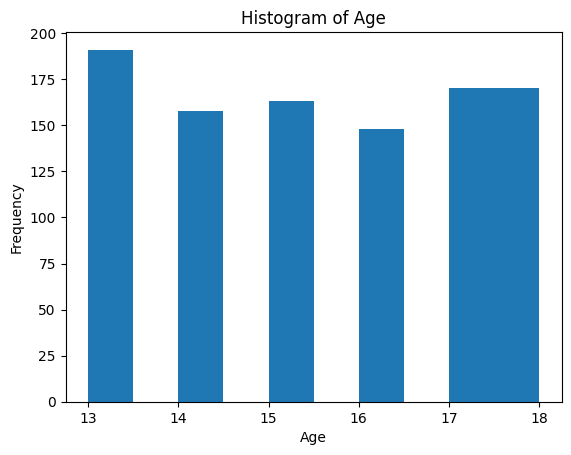

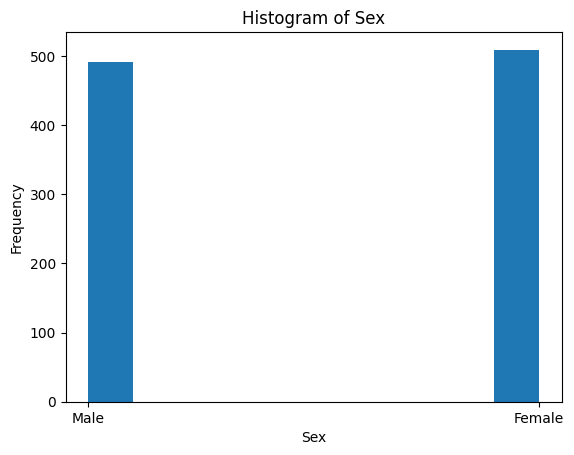

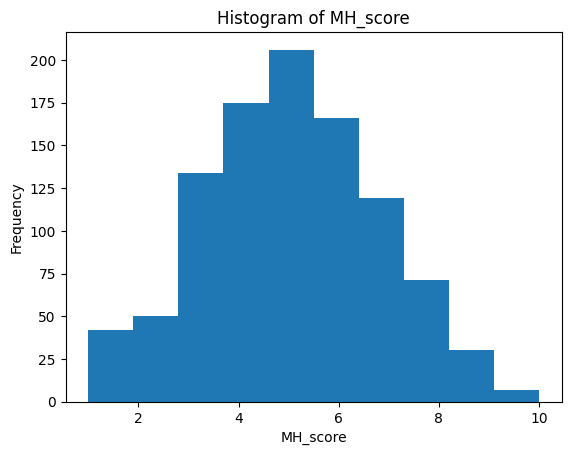

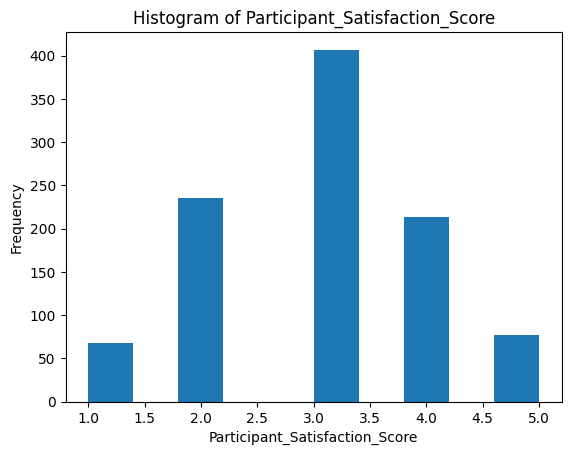

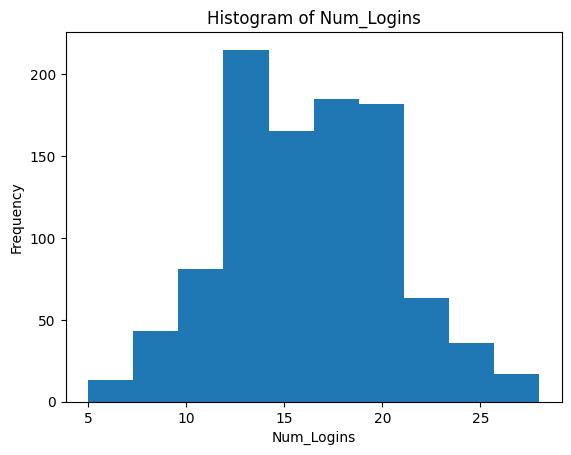

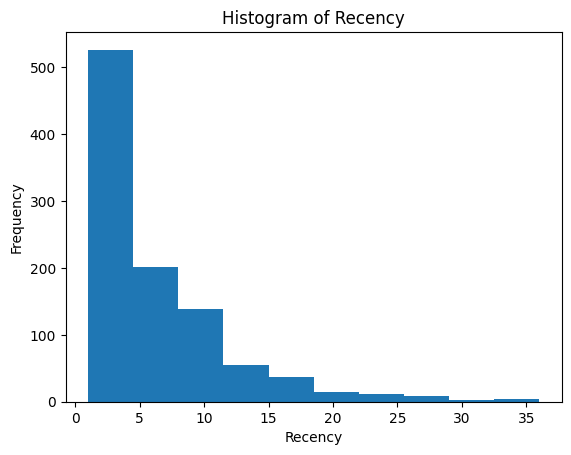

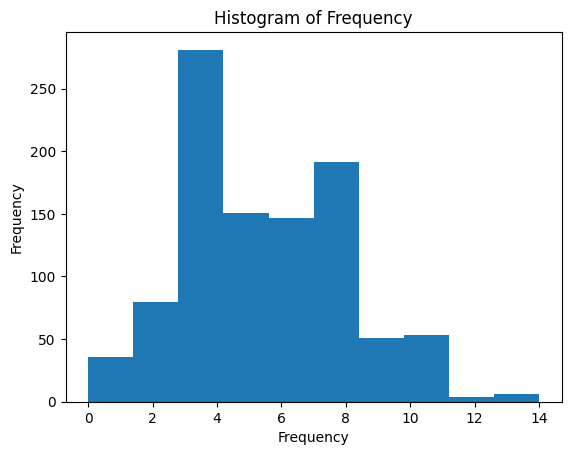

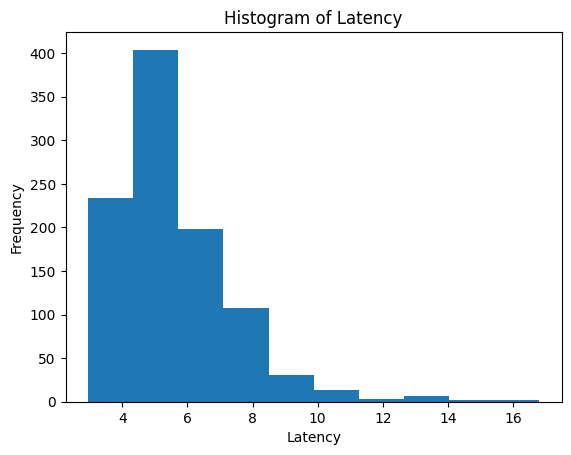

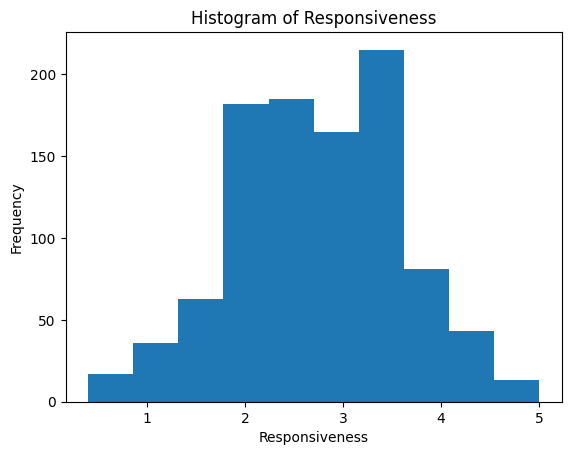

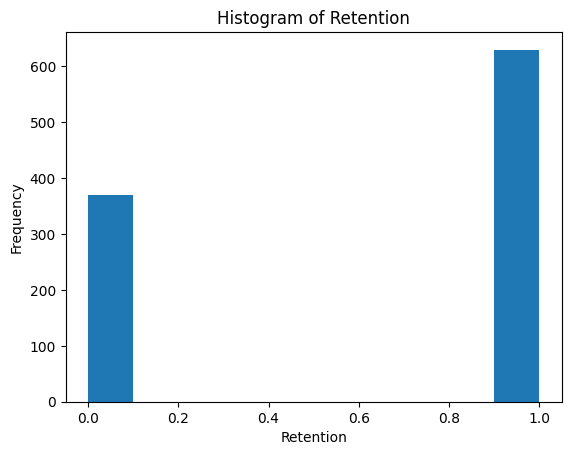

In [9]:
# Define the variables for which you want to create histograms
variables = ['Age', 'Sex', 'MH_score', 'Participant_Satisfaction_Score', 'Num_Logins', 'Recency', 'Frequency', 'Latency', 'Responsiveness', 'Retention']

# Iterate over the variables and create a histogram for each
for variable in variables:
    plt.figure()  # Create a new figure for each variable
    plt.hist(df[variable])
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {variable}')
    plt.show()
